In [1]:
# 분류 DNN 모델 구현 ########################
from keras import layers, models
 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        
        self.add(layers.Dense(Nh_l[0], activation='relu', 
                 input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(0.05))
        
        self.add(layers.Dense(Nh_l[1], activation='relu', 
                 name='Hidden-2'))       
        self.add(layers.Dropout(0.1))
        
        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])

        
# 데이터 준비 ##############################
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)


# 학습 효과 분석 ##############################
from ann_mnist_cl import plot_loss, plot_acc
import matplotlib.pyplot as plt


# 분류 DNN 학습 및 테스팅 ####################
def main():
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Nout)
    history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
    
    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

Using TensorFlow backend.


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s - loss: 1.9953 - acc: 0.2689 - val_loss: 1.8309 - val_acc: 0.3426
Epoch 2/100
40000/40000 [==============================] - 3s - loss: 1.8394 - acc: 0.3330 - val_loss: 1.7579 - val_acc: 0.3739
Epoch 3/100
40000/40000 [==============================] - 3s - loss: 1.7818 - acc: 0.3605 - val_loss: 1.7438 - val_acc: 0.3828
Epoch 4/100
40000/40000 [==============================] - 3s - loss: 1.7448 - acc: 0.3756 - val_loss: 1.7211 - val_acc: 0.3824
Epoch 5/100
40000/40000 [==============================] - 3s - loss: 1.7135 - acc: 0.3850 - val_loss: 1.6867 - val_acc: 0.4001
Epoch 6/100
40000/40000 [==============================] - 3s - loss: 1.6931 - acc: 0.3958 - val_loss: 1.6698 - val_acc: 0.4076
Epoch 7/100
40000/40000 [==============================] - 3s - loss: 1.6818 - acc: 0.3961 - val_loss: 1.6346 - val_acc: 0.4142
Epoch 8/100
40000/40000 [=============================

40000/40000 [==============================] - 3s - loss: 1.4779 - acc: 0.4704 - val_loss: 1.5488 - val_acc: 0.4528
Epoch 65/100
40000/40000 [==============================] - 3s - loss: 1.4723 - acc: 0.4725 - val_loss: 1.5482 - val_acc: 0.4544
Epoch 66/100
40000/40000 [==============================] - 3s - loss: 1.4740 - acc: 0.4709 - val_loss: 1.5548 - val_acc: 0.4509
Epoch 67/100
40000/40000 [==============================] - 3s - loss: 1.4773 - acc: 0.4707 - val_loss: 1.5431 - val_acc: 0.4523
Epoch 68/100
40000/40000 [==============================] - 3s - loss: 1.4660 - acc: 0.4761 - val_loss: 1.5538 - val_acc: 0.4431
Epoch 69/100
40000/40000 [==============================] - 4s - loss: 1.4750 - acc: 0.4701 - val_loss: 1.5272 - val_acc: 0.4621
Epoch 70/100
40000/40000 [==============================] - 3s - loss: 1.4736 - acc: 0.4703 - val_loss: 1.5370 - val_acc: 0.4587
Epoch 71/100
40000/40000 [==============================] - 3s - loss: 1.4729 - acc: 0.4734 - val_loss: 1.5400

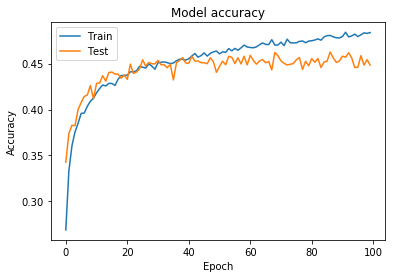

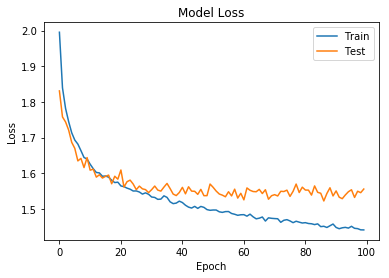

In [2]:
Nin = 784
Nh_l = [50, 50]
number_of_class = 10
Nout = number_of_class

(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()